In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
# print the shape of the Data Frame
data.shape

(200, 4)

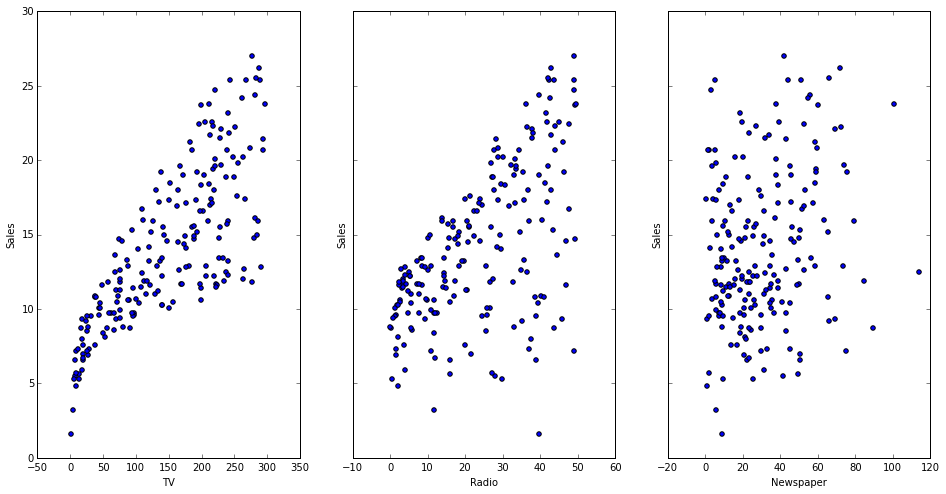

In [4]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1,3,sharey=True)
data.plot(kind='scatter',x='TV',y='Sales',ax=axs[0], figsize=(16,8))
data.plot(kind='scatter',x='Radio',y='Sales',ax=axs[1])
data.plot(kind='scatter',x='Newspaper',y='Sales',ax=axs[2])

In [5]:
import statsmodels.formula.api as smf

# Create a fitted model in one line
# fitting is about placing them into a specific model and tweaking it
lm = smf.ols(formula='Sales ~ TV', data=data).fit()

# print the coefficients
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [6]:
# Lets say that there was a new market where the TV advertising spend was $50,000. What would we predict for the Sales in that market?

7.032594 + 0.047527 * 50

9.408944

In [8]:
# Using stats model
# Need to create a DataFrame since the Statsmodels formula interface expects it
x_new = pd.DataFrame({'TV':[50]})
x_new.head()
lm.predict(x_new)

array([ 9.40942557])

In [9]:
# Create a DataFrame with the min and max values of TV
x_new = pd.DataFrame({'TV':[data.TV.min(), data.TV.max()]})
x_new.head()

,TV
0,0.7
1,296.4


In [10]:
# make predictions for those x calues and store them
preds = lm.predict(x_new)
preds

array([  7.0658692 ,  21.12245377])

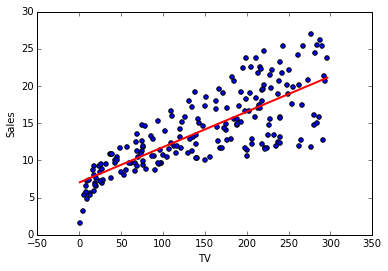

In [11]:
# first, plot the observed data
data.plot(kind='scatter', x='TV', y='Sales')

# then, plot the least squares line
plt.plot(x_new, preds, c='red', linewidth=2)

In [12]:
# statsmodels calculates 95% confidence intervals for model coefficients
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [13]:
# print the p-values for the model coefficients
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [14]:
# print the R-squared value for the model
lm.rsquared

0.61187505085007099

In [15]:
# create a fitted model with all three features
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()

# print the coefficients
lm.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [16]:
# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 13 Jan 2016   Prob (F-statistic):           1.58e-96
Time:                        17:48:27   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000         2.324     3.554
TV             0.0458      0.001     32.809      0.000         0.043     0.049
Radio          0.1885      0.009     21.893      0.000         0.172     0.206
Newspaper     -0.0010      0.006     -0.177      0.860        -0.013     0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# only include TV and Radio in the model
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
lm.rsquared

0.89721063817895219

In [18]:
# create X and Y
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data.Sales

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coeeficients
print lm.intercept_
print lm.coef_

2.93888936946
[ 0.04576465  0.18853002 -0.00103749]


In [19]:
# pair the feature names with the coefficients
zip(feature_cols, lm.coef_)

[('TV', 0.045764645455397601),
 ('Radio', 0.18853001691820448),
 ('Newspaper', -0.001037493042476266)]

In [20]:
# predict for a new observation
lm.predict([100,25,25])

array([ 12.20266701])

In [21]:
# calculate the R-squared
lm.score(X, y)

0.89721063817895219

In [22]:
# Handling Categorical Predictors with 2 Categories
import numpy as np

# set a seed for reproducibility
np.random.seed(12345)

# create a Series of booleans in which roughly half are True
nums = np.random.rand(len(data))
mask_large = nums > 0.5

# initially set Size to small, then change roughly half to be large
data['Size'] = 'small'
data.loc[mask_large, 'Size'] = 'large'
data.head()

,TV,Radio,Newspaper,Sales,Size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


In [23]:
# create a new Series called IsLarge
data['IsLarge'] = data.Size.map({'small':0, 'large':1})
data.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge
1,230.1,37.8,69.2,22.1,large,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,large,1


In [24]:
# create X and Y
feature_cols = ['TV', 'Radio', 'Newspaper', 'IsLarge']
X = data[feature_cols]
y = data.Sales

#instantiate, fit
lm = LinearRegression()
lm.fit(X,y)

# print coefficients
zip(feature_cols, lm.coef_)

[('TV', 0.045719820924362803),
 ('Radio', 0.1887281431342786),
 ('Newspaper', -0.00109767944835161),
 ('IsLarge', 0.057423850854827846)]

In [25]:
# Handling Categorical Predictors With More Than 2 Categories
np.random.seed(123456)

# assign roughly 1/3 of observations to each group
nums = np.random.rand(len(data))
mask_suburban = (nums>0.33) & (nums<0.66)
mask_urban = nums > 0.66
data['Area'] = 'rural'
data.loc[mask_suburban, 'Area'] = 'suburban'
data.loc[mask_urban, 'Area'] = 'urban'
data.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge,Area
1,230.1,37.8,69.2,22.1,large,1,rural
2,44.5,39.3,45.1,10.4,small,0,urban
3,17.2,45.9,69.3,9.3,small,0,rural
4,151.5,41.3,58.5,18.5,small,0,urban
5,180.8,10.8,58.4,12.9,large,1,suburban


In [26]:
# create 3 dummy variables using get_dummies, then exclude the 1st dummy column (why?)
area_dummies = pd.get_dummies(data.Area, prefix = 'Area').iloc[:, 1:]

#concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis = 1 means columns)
data = pd.concat([data, area_dummies], axis=1)
data.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge,Area,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,large,1,rural,0,0
2,44.5,39.3,45.1,10.4,small,0,urban,0,1
3,17.2,45.9,69.3,9.3,small,0,rural,0,0
4,151.5,41.3,58.5,18.5,small,0,urban,0,1
5,180.8,10.8,58.4,12.9,large,1,suburban,1,0


In [27]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper', 'IsLarge', 'Area_suburban', 'Area_urban']
X = data[feature_cols]
y = data.Sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X,y)

#print coefficients
zip(feature_cols, lm.coef_)

[('TV', 0.045744010363313742),
 ('Radio', 0.18786669552525803),
 ('Newspaper', -0.0010876977267108845),
 ('IsLarge', 0.077396607497479258),
 ('Area_suburban', -0.1065629901595867),
 ('Area_urban', 0.26813802165220085)]